In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('datasets/housing.xls', header=None, delimiter=r"\s+", names=column_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
df["ZN"].value_counts()

ZN
0.0      372
20.0      21
80.0      15
22.0      10
12.5      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
95.0       4
60.0       4
21.0       4
33.0       4
55.0       3
70.0       3
34.0       3
52.5       3
35.0       3
28.0       3
75.0       3
82.5       2
85.0       2
17.5       1
100.0      1
18.0       1
Name: count, dtype: int64

In [5]:
df["CHAS"].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [6]:
# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=column_names)
df_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,-0.014454
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,-0.210362
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,0.148802
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,-0.057989


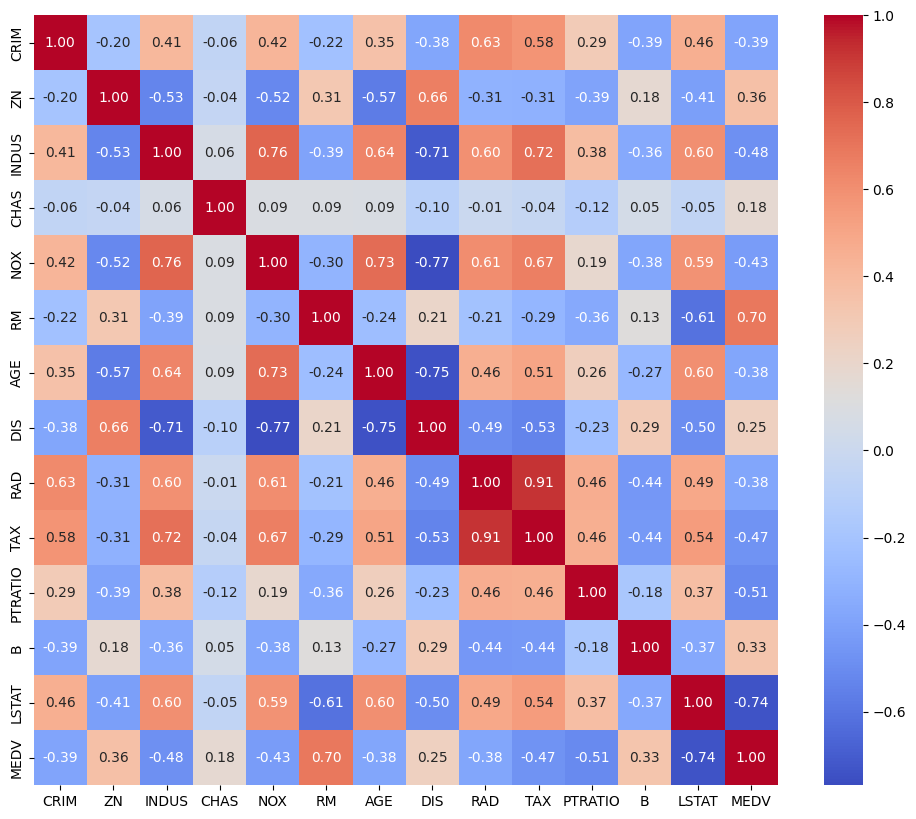

In [7]:
# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_scaled.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

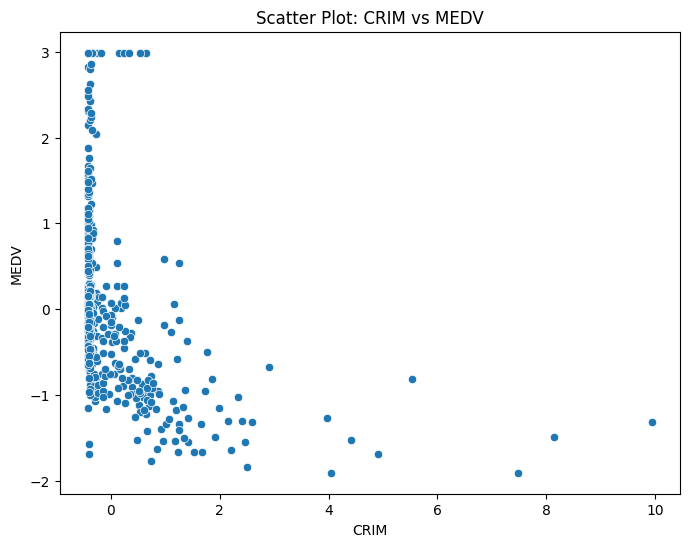

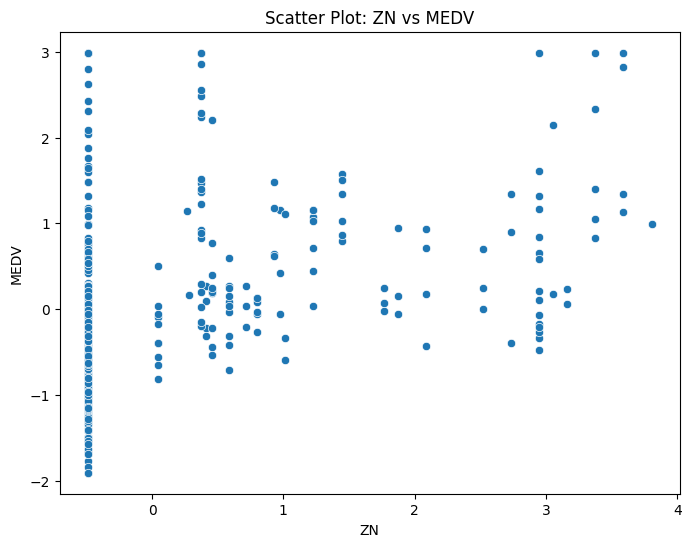

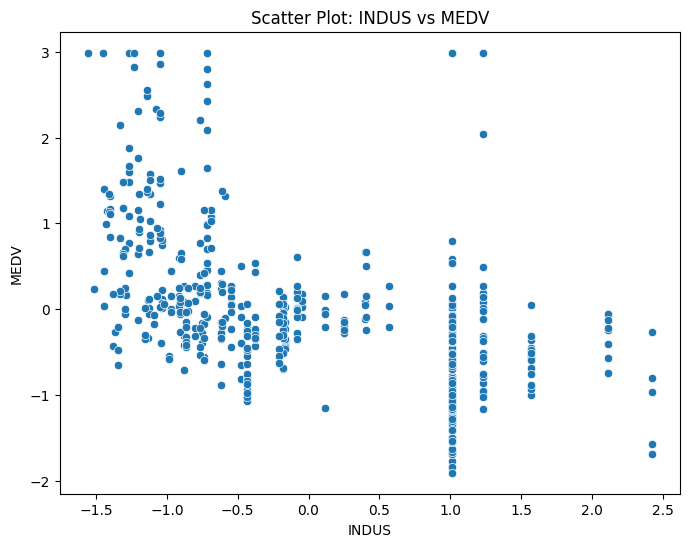

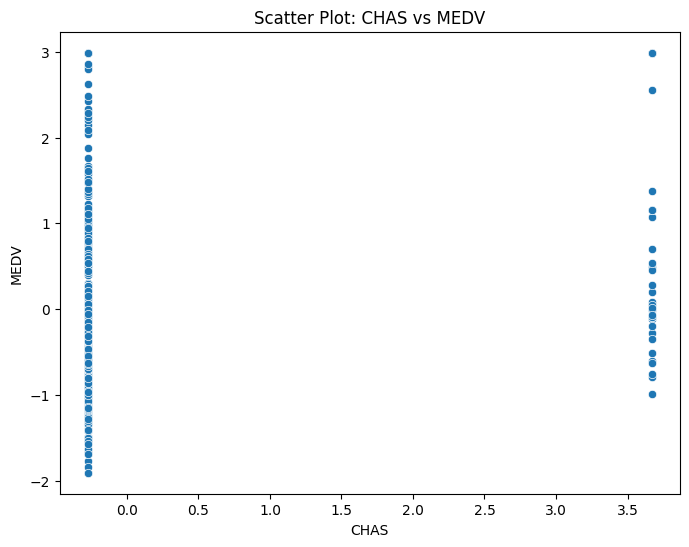

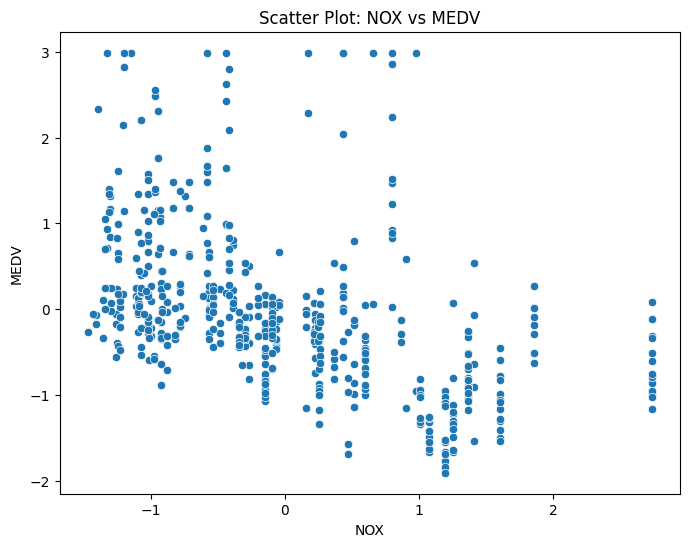

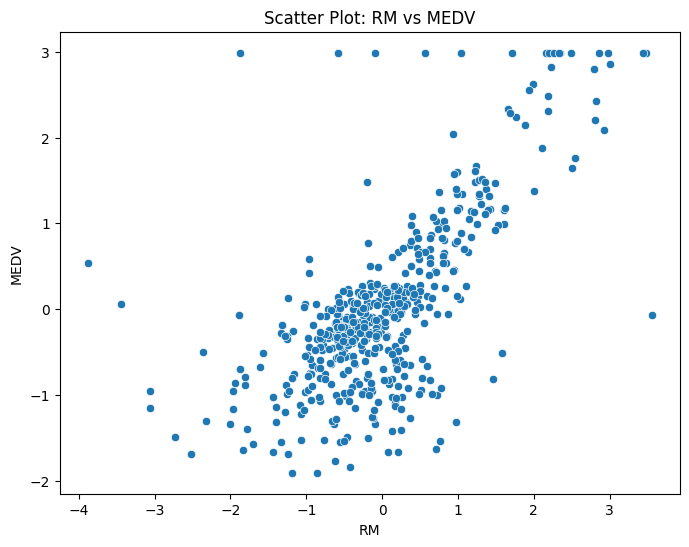

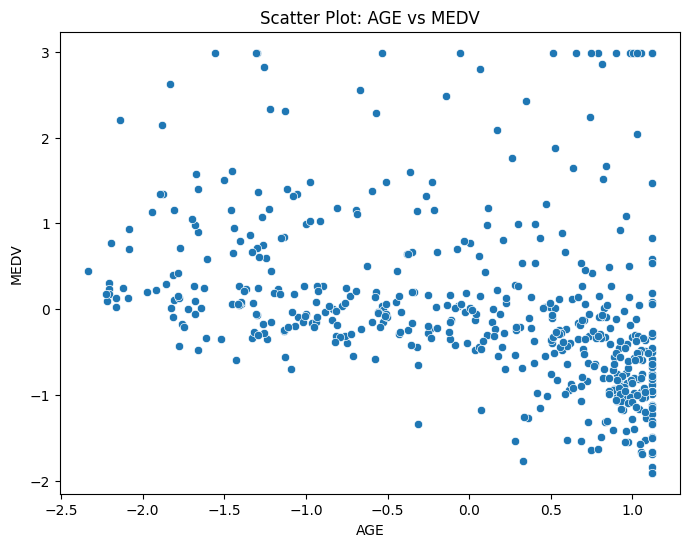

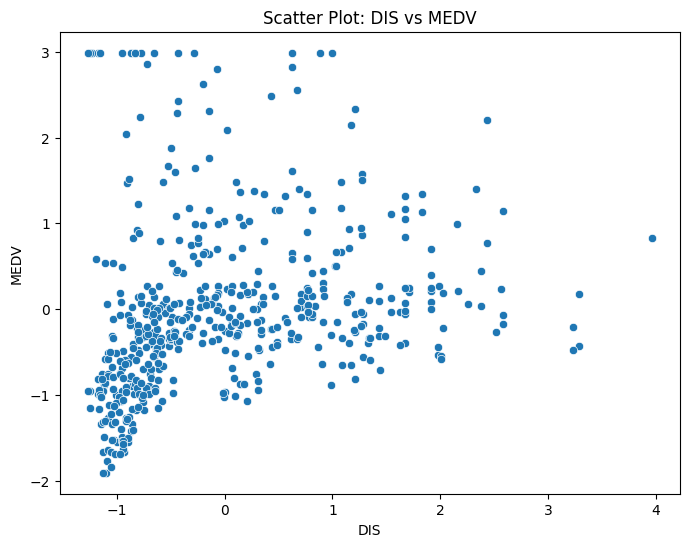

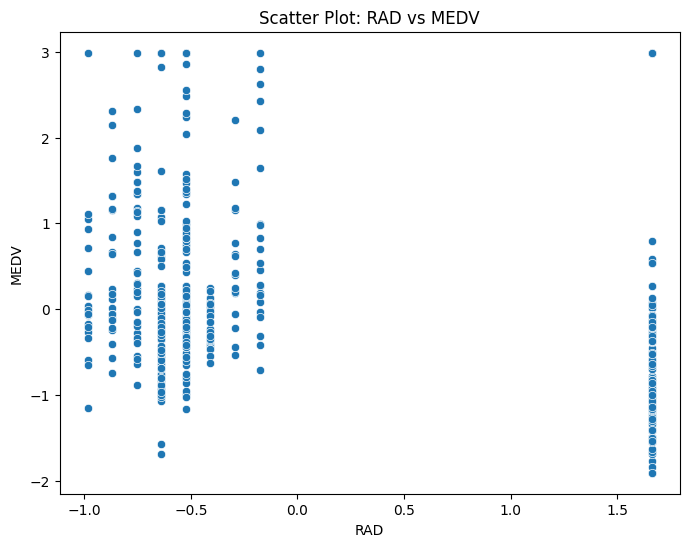

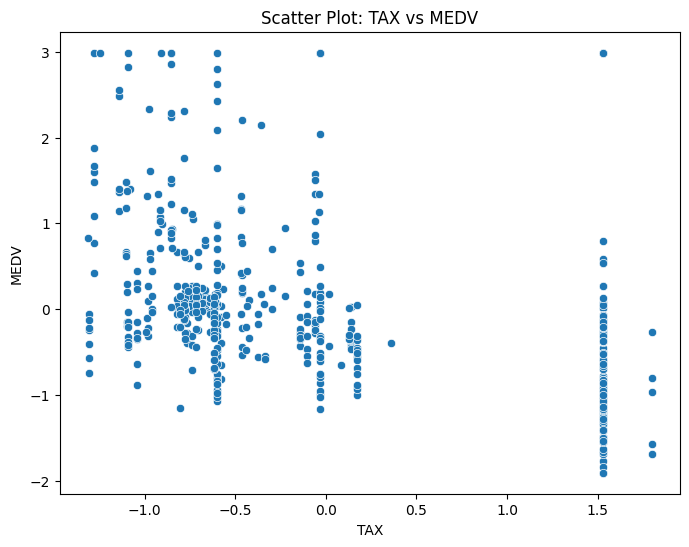

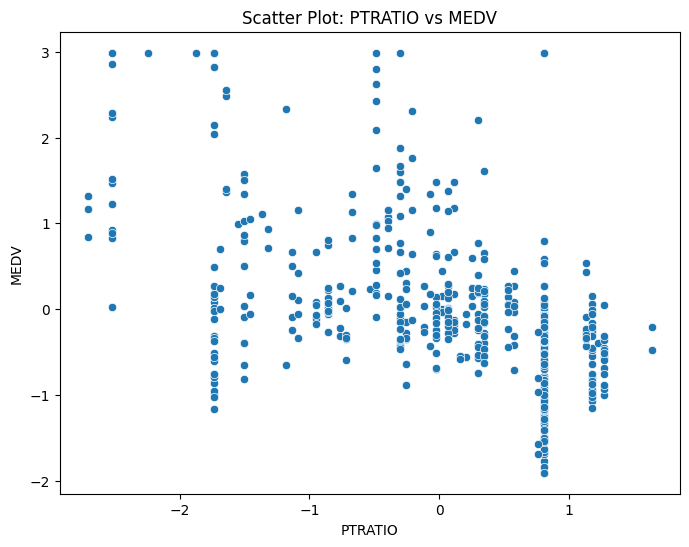

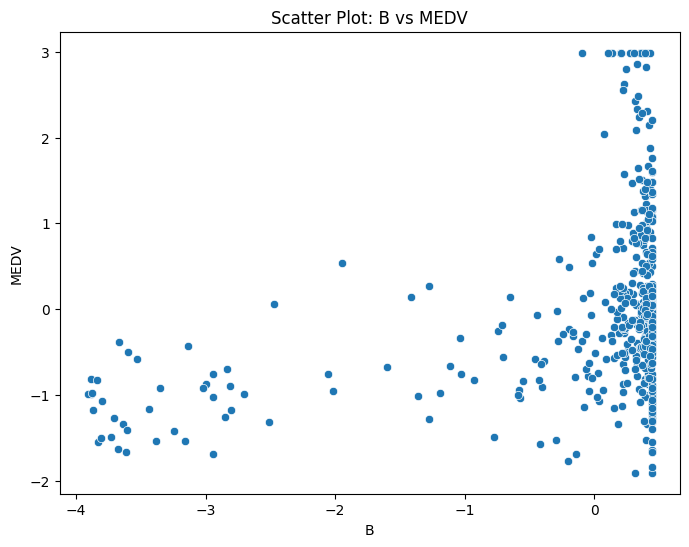

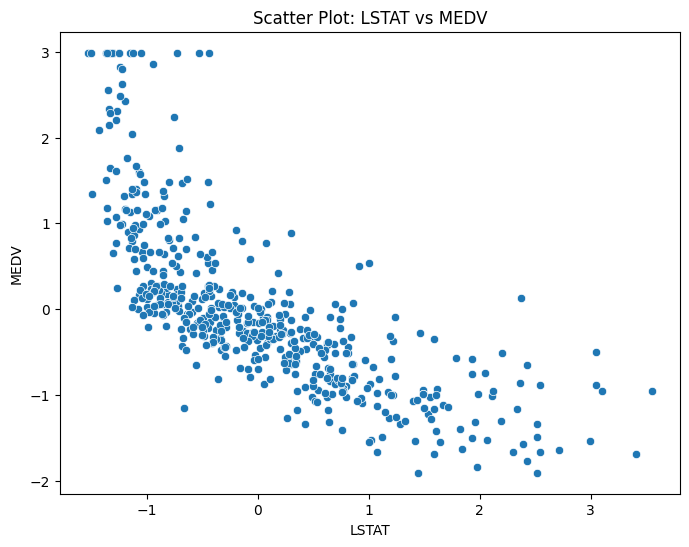

In [9]:
# Generate scatter plots for each feature against the target variable
target_variable = 'MEDV'  # Replace with your actual target variable
for column in df_scaled.columns:
    if column != target_variable:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=df_scaled[column], y=df_scaled[target_variable])
        plt.title(f'Scatter Plot: {column} vs {target_variable}')
        plt.xlabel(column)
        plt.ylabel(target_variable)
        plt.show()

In [102]:
# Split the data into training and testing sets
X = df_scaled.drop('MEDV', axis=1)
y = df_scaled['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [105]:
# Lasso Regression
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [107]:
# Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [108]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
root_mse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'RMSE: {root_mse}')
print(f'R²: {r2}')

MSE: 0.10101332519039266
RMSE: 0.31782593536461534
R²: 0.8837166213041475


In [43]:
# Feature Importance
feature_importances = model.feature_importances_
feature_importances = pd.Series(feature_importances, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
feature_importances

RM         0.503973
LSTAT      0.309967
DIS        0.059452
CRIM       0.038207
PTRATIO    0.016007
NOX        0.015939
TAX        0.015841
B          0.013335
AGE        0.013262
INDUS      0.007073
RAD        0.004034
ZN         0.001894
CHAS       0.001014
dtype: float64

In [109]:
# Hyperparameter Tuning with Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_params

Fitting 3 folds for each of 81 candidates, totalling 243 fits


{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [111]:
# Evaluate the model with the best parameters
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
root_mse_best = root_mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'MSE: {mse_best}')
print(f'RMSE: {root_mse_best}')
print(f'R²: {r2_best}')

MSE: 0.10088416998493699
RMSE: 0.31762268493439977
R²: 0.8838653007346903


## **Kokkuvõte**

Kasutasin 3 regressioonimudelit normaliseeritud andmete põhjal: LR, LASSO ja Random Forest Regressor. Normaliseerimine on tavaliselt alati kasulik regressioonimudelite jaoks. 

Alguses mõtlesin, et hea oleks treenida tunnuste põhjal, millel on tugev korrelatsioon (RM ja LSTAT) sihtmuutujaga (MEDV). Tuli välja, et tulemused olid paremad kui treenida üle kogu andmestiku.

Tegin ka hüperparameetrite tuunimist kõige paremale mudelile (Random Forest Regressor), aga tulemused ei läinud eriti paremaks. Kui proovisin veel laiema parameetrite võrgustiku ette anda, läksid tulemused isegi natuke kehvemaks. 

Erinevused tulemustes täpsemalt:

| Mudel                  | RM ja LSTAT                                                                  | Kogu andmestik                                                                 | Peale tuunimist                                                                 |
|------------------------|-------------------------------------------------------------------------------|-------------------------------------------------------------------------------|-------------------------------------------------------------------------------|
| **Linear Regression**  | MSE: 0.3700954141951123<br>RMSE: 0.6083546779594222<br>R²: 0.5739577415025858 | MSE: 0.28774280014026593<br>RMSE: 0.5364166292540398<br>R²: 0.6687594935356322 | |
| **Lasso**              | MSE: 0.36208460615146515<br>RMSE: 0.601734664242858<br>R²: 0.5831795330201252 | MSE: 0.3251596524239152<br>RMSE: 0.5702277197961488<br>R²: 0.6256863841660956 | |
| **Random Forest Regressor** | MSE: 0.29733772408900744<br>RMSE: 0.5452868273569493<br>R²: 0.6577141173638603 | MSE: 0.10101332519039266<br>RMSE: 0.31782593536461534<br>R²: 0.8837166213041475 | MSE: 0.10088416998493699<br>RMSE: 0.31762268493439977<br>R²: 0.8838653007346903 |

